## Loading the clean data and Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import warnings

In [2]:
df_2018= pd.read_csv('fin_inpdata2018.csv')

df_2017= pd.read_csv('fin_inpdata2017.csv')

df=pd.concat([df_2018, df_2017], axis=0)
#df = df_2018.copy()

In [3]:
df.shape

(85813, 37)

In [4]:
df['comb'].value_counts(normalize=False)

0    80294
1     5519
Name: comb, dtype: int64

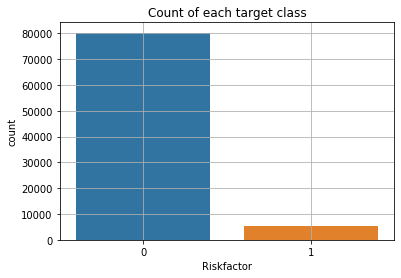

In [5]:
sns.countplot(df['comb'])
plt.xlabel('Riskfactor')
plt.ylabel('count')
plt.title('Count of each target class')
plt.grid(b= True, which='major', axis='both')

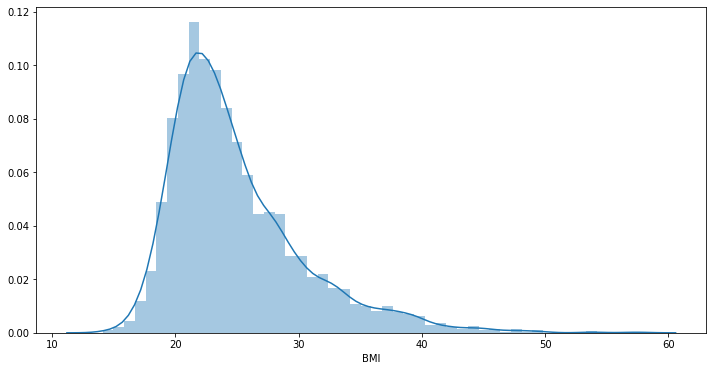

In [109]:
plt.figure(figsize=(12,6))
#sns.barplot(x= df['BMI'], y= df['comb'])
sns.distplot(df[df['comb']==1]['BMI'])

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85813 entries, 0 to 46433
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MAGER      85813 non-null  int64  
 1   PRIORLIVE  85813 non-null  int64  
 2   PRIORDEAD  85813 non-null  int64  
 3   PRIORTERM  85813 non-null  int64  
 4   LBO_REC    85813 non-null  int64  
 5   TBO_REC    85813 non-null  int64  
 6   ILLB_R11   85813 non-null  int64  
 7   ILP_R11    85813 non-null  int64  
 8   PRECARE    85813 non-null  int64  
 9   PREVIS     85813 non-null  int64  
 10  WIC        85813 non-null  object 
 11  CIG_0      85813 non-null  int64  
 12  CIG_1      85813 non-null  int64  
 13  CIG_2      85813 non-null  int64  
 14  CIG_3      85813 non-null  int64  
 15  M_HT_IN    85813 non-null  int64  
 16  BMI        85813 non-null  float64
 17  PWGT_R     85813 non-null  int64  
 18  DWGT_R     85813 non-null  int64  
 19  WTGAIN     85813 non-null  int64  
 20  ILOP_R

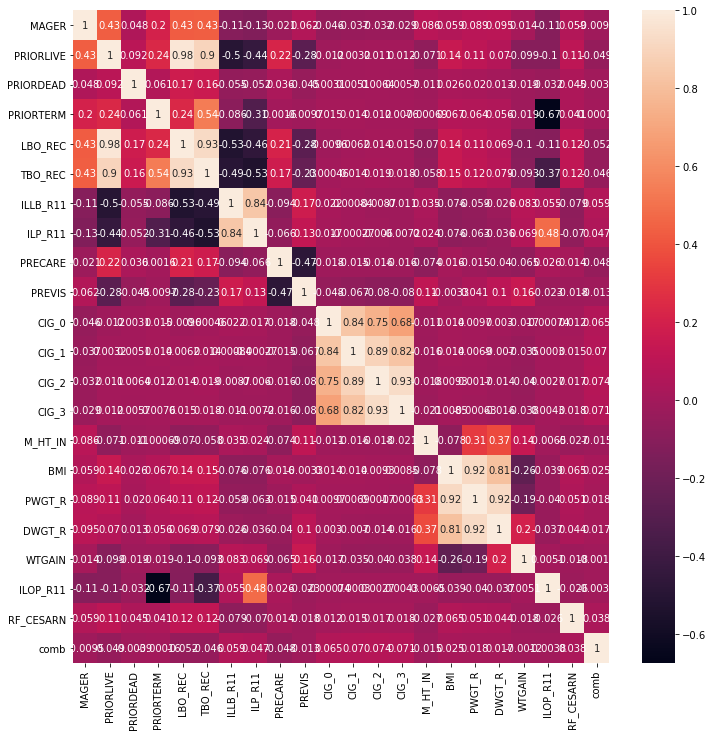

In [111]:
corrMatrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

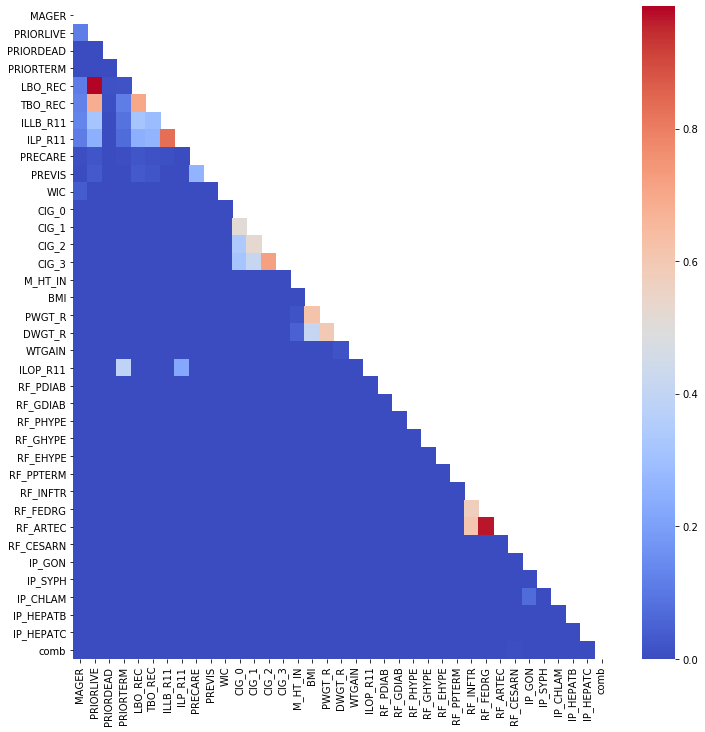

In [112]:
warnings.filterwarnings('ignore')
dfp = pps.matrix(df)

mask = np.triu(np.ones_like(dfp, dtype=np.bool))

plt.figure(figsize=(12,12))
sns.heatmap(dfp, mask=mask, cmap='coolwarm' )

#### From above correlation heatmap we can drop few highly correlated columns and combine few features to one

 * PRIORLIVE is highly correlated with LBO_REC,TBO_REC,PRIOTERM,ILLB_R11,ILP_R andPRIORDEAD
  * Riskfactors RF are also correlated
   * 'M_HT_IN', 'BMI', 'PWGT_R','DWGT_R', 'WTGAIN' are correlated with 
 
Reduced fd = ['MAGER9','PRIORLIVE','PRIORDEAD','PRIORTERM','PRECARE', 'PREVIS',
               combine('WIC','CIG_0', 'CIG_1', 'CIG_2', 'CIG_3'), 'BMI_R',
               combine('RF_PDIAB','RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC'), 
               'RF_CESARN',combine('IP_GON', 'IP_SYPH', 'IP_CHLAM', 'IP_HEPATB', 'IP_HEPATC')]

In [63]:
df.columns

Index(['MAGER', 'PRIORLIVE', 'PRIORDEAD', 'PRIORTERM', 'LBO_REC', 'TBO_REC',
       'ILLB_R11', 'ILP_R11', 'PRECARE', 'PREVIS', 'WIC', 'CIG_0', 'CIG_1',
       'CIG_2', 'CIG_3', 'M_HT_IN', 'BMI', 'PWGT_R', 'DWGT_R', 'WTGAIN',
       'ILOP_R11', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE',
       'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC', 'RF_CESARN', 'IP_GON',
       'IP_SYPH', 'IP_CHLAM', 'IP_HEPATB', 'IP_HEPATC', 'comb', 'DMETH_REC',
       'APGAR5', 'MM_MTR', 'MM_PLAC', 'MM_AICU', 'MTRAN', 'AB_AVEN1',
       'AB_AVEN6', 'AB_NICU', 'AB_SURF', 'AB_ANTI', 'AB_SEIZ'],
      dtype='object')

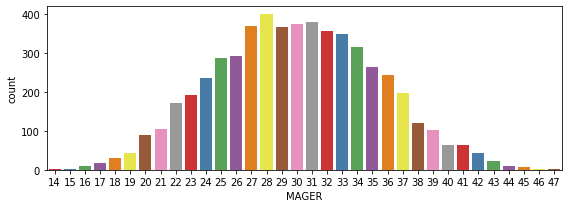

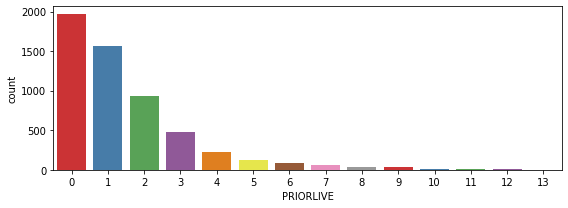

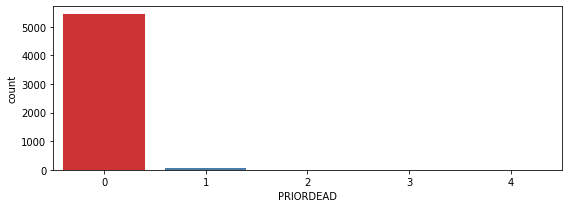

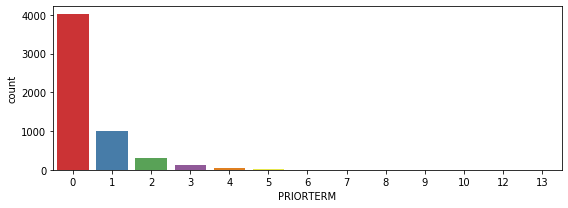

In [113]:
for col in ['MAGER', 'PRIORLIVE', 'PRIORDEAD', 'PRIORTERM']:
    
    f, ax = plt.subplots(1, 1, figsize=(8,3))
    
    
    sns.countplot(x=col, data=df[df['comb']==1], ax=ax, palette="Set1")
    f.tight_layout()

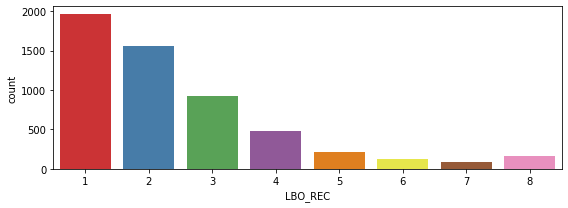

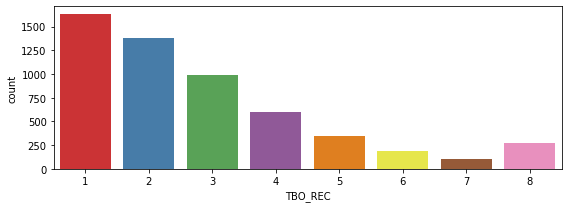

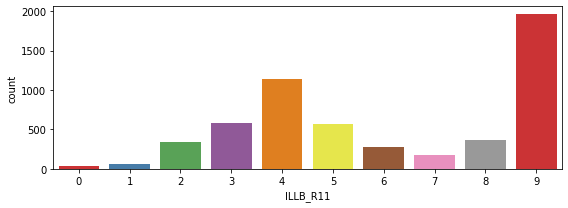

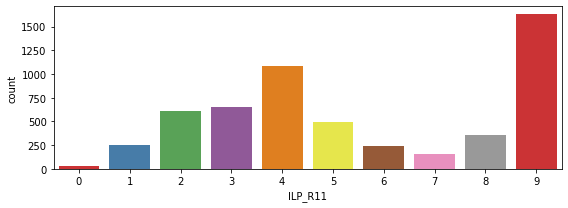

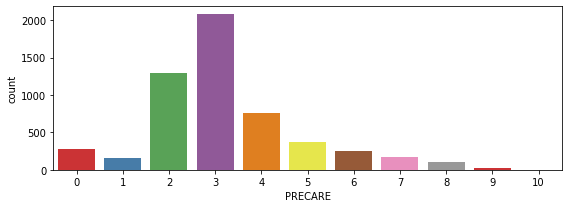

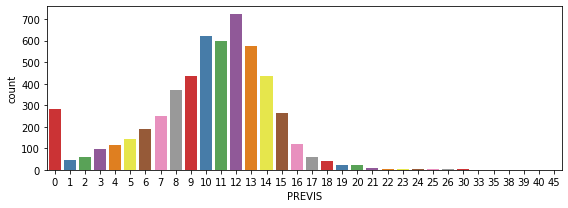

In [114]:
for col in ['LBO_REC', 'TBO_REC', 'ILLB_R11', 'ILP_R11', 'PRECARE', 'PREVIS']:
    
    f, ax = plt.subplots(1, 1, figsize=(8,3))
    
    
    sns.countplot(x=col, data=df[df['comb']==1], ax=ax, palette="Set1")
    f.tight_layout()

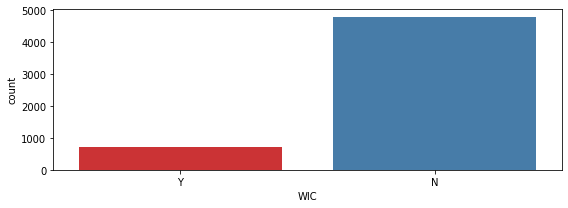

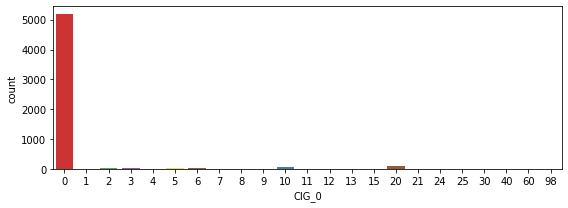

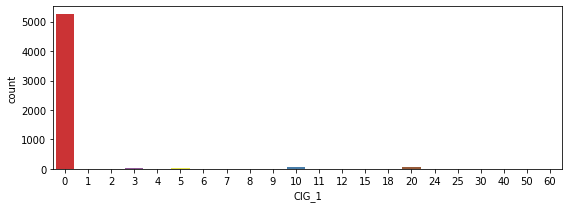

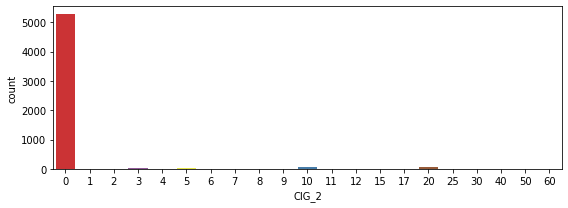

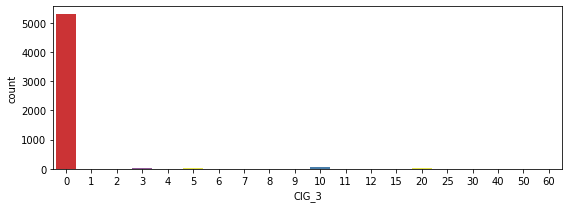

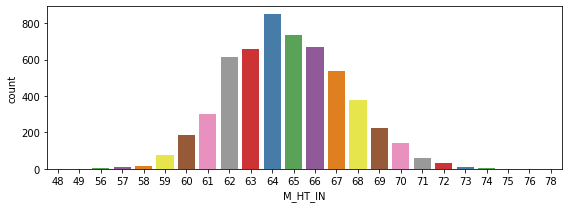

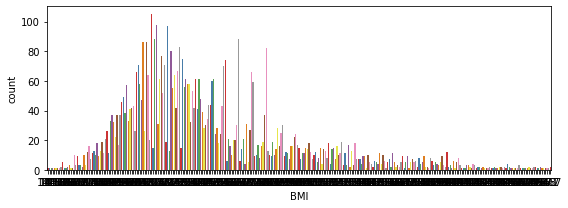

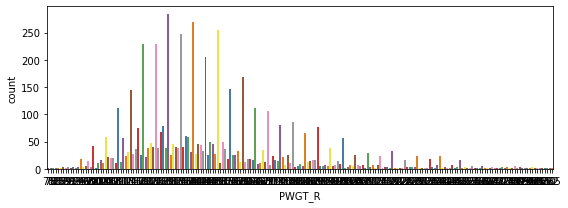

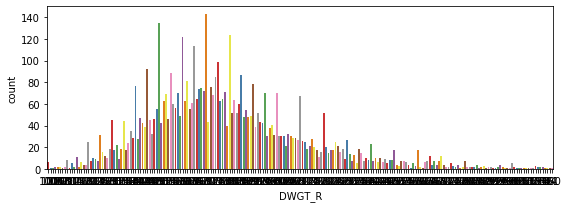

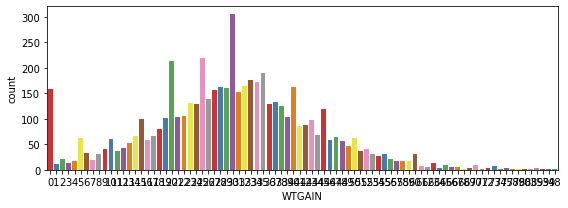

In [115]:
for col in ['WIC', 'CIG_0', 'CIG_1',
       'CIG_2', 'CIG_3', 'M_HT_IN', 'BMI', 'PWGT_R', 'DWGT_R', 'WTGAIN',]:
    
    f, ax = plt.subplots(1, 1, figsize=(8,3))
    
    
    sns.countplot(x=col, data=df[df['comb']==1], ax=ax, palette="Set1")
    f.tight_layout()


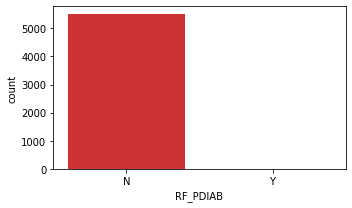

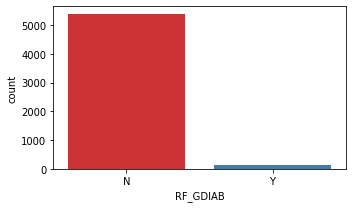

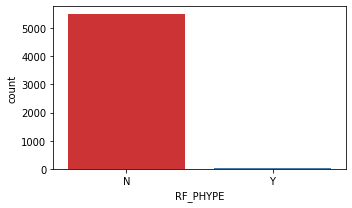

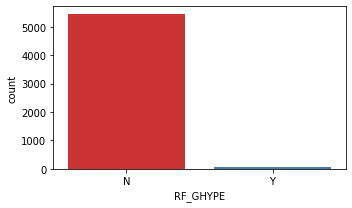

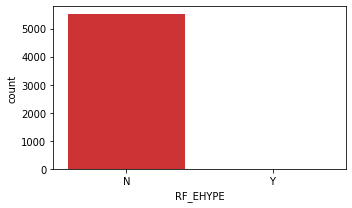

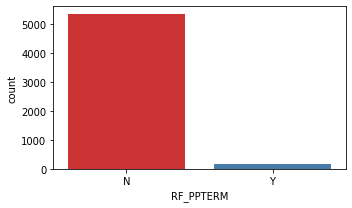

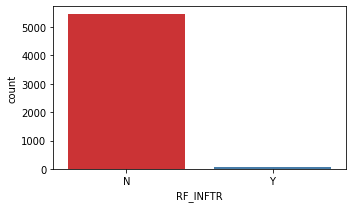

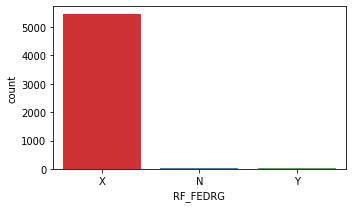

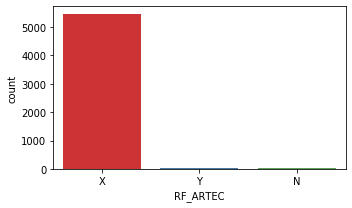

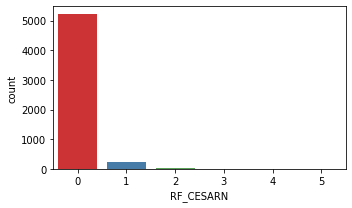

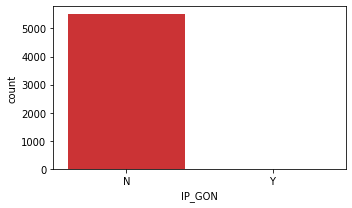

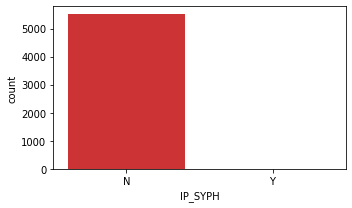

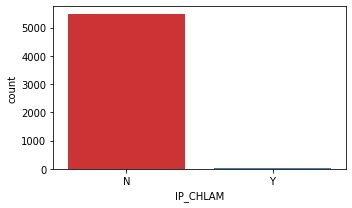

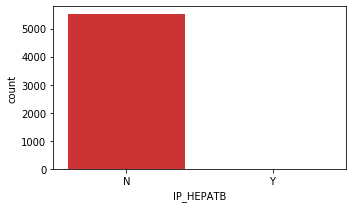

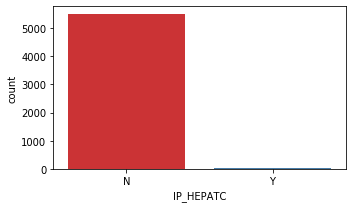

In [85]:
for col in ['RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM',
       'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC', 'RF_CESARN', 'IP_GON', 'IP_SYPH',
       'IP_CHLAM', 'IP_HEPATB', 'IP_HEPATC']:
    
    f, ax = plt.subplots(1, 1, figsize=(5,3))
    
    
    sns.countplot(x=col, data=df[df['comb']==1], ax=ax, palette="Set1")
    f.tight_layout()

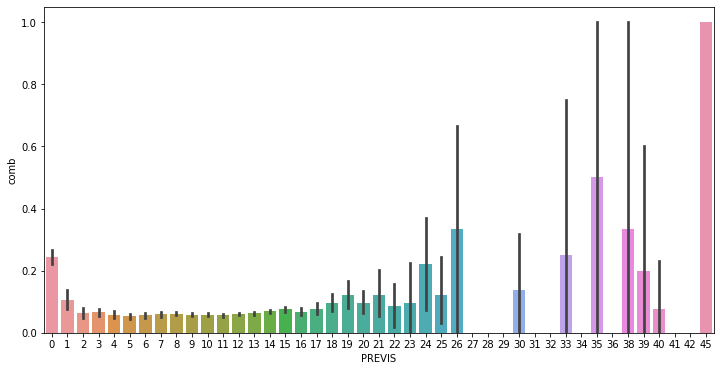

In [116]:
plt.figure(figsize=(12,6))
sns.barplot(x= df['PREVIS'], y= df['comb'])

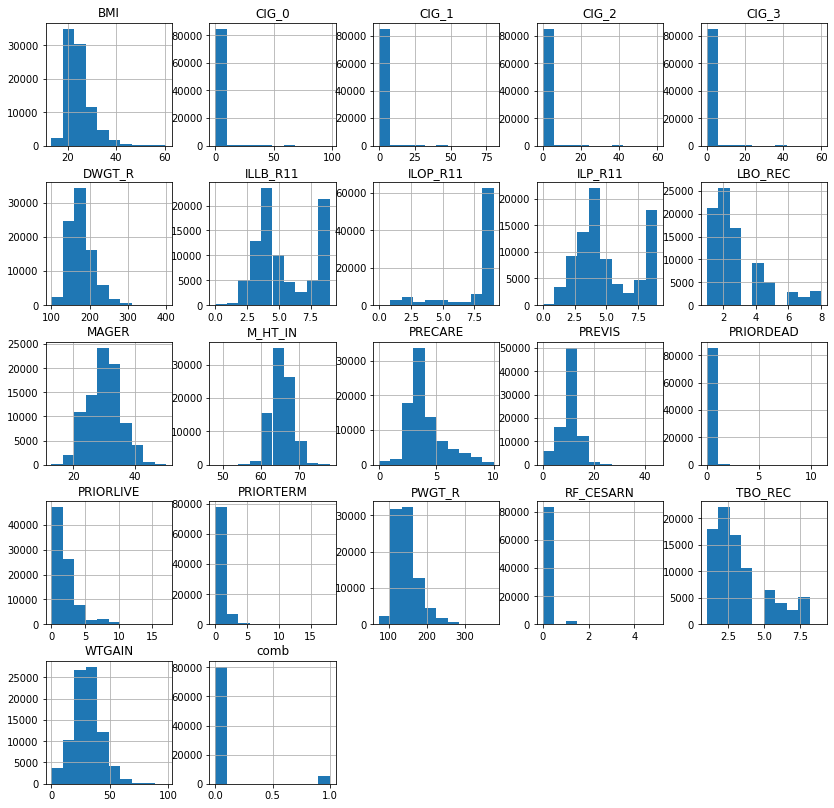

In [117]:
df[df.describe().columns].hist(figsize=(14,14));

In [6]:
df_n = df.copy()

In [119]:
df_n['RF']= df_n[['RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 
              'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC']].isin(['Y']).sum(axis=1)

df_n['RF'] = df_n['RF'].apply(lambda x: min(x,1))

df_n['IP']= df_n[['IP_GON', 'IP_SYPH', 'IP_CHLAM', 'IP_HEPATB', 'IP_HEPATC']].isin(['Y']).sum(axis=1)

df_n['IP'] = df_n['IP'].apply(lambda x: min(x,1))

df_n = df_n.drop(['RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 
              'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC','IP_GON', 'IP_SYPH', 'IP_CHLAM', 'IP_HEPATB', 'IP_HEPATC'],axis=1)

### MAking 'WIC column to int with value 0 and 1'

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_n.select_dtypes(include = ['object']).columns:
    
    le.fit(df_n[col].unique())
    df_n.loc[:, col] = le.transform(df_n[col])

df_n.columns

## Combining CIG and WIC columns
df_n['SMK']= df_n[['CIG_0', 'CIG_1',
       'CIG_2', 'CIG_3','WIC']].sum(axis=1)


df_n = df_n.drop(['CIG_0', 'CIG_1',
       'CIG_2', 'CIG_3','WIC'],axis=1)

df_n = df_n[['MAGER', 'PRIORLIVE', 'PRIORDEAD', 'PRIORTERM', 'LBO_REC', 'TBO_REC',
       'ILLB_R11', 'ILP_R11', 'PRECARE', 'PREVIS', 'M_HT_IN', 'BMI', 'PWGT_R',
       'DWGT_R', 'WTGAIN', 'ILOP_R11', 'RF_CESARN', 'RF', 'IP', 'SMK','comb']]

df_n.columns

Index(['MAGER', 'PRIORLIVE', 'PRIORDEAD', 'PRIORTERM', 'LBO_REC', 'TBO_REC',
       'ILLB_R11', 'ILP_R11', 'PRECARE', 'PREVIS', 'M_HT_IN', 'BMI', 'PWGT_R',
       'DWGT_R', 'WTGAIN', 'ILOP_R11', 'RF_CESARN', 'RF', 'IP', 'SMK', 'comb'],
      dtype='object')

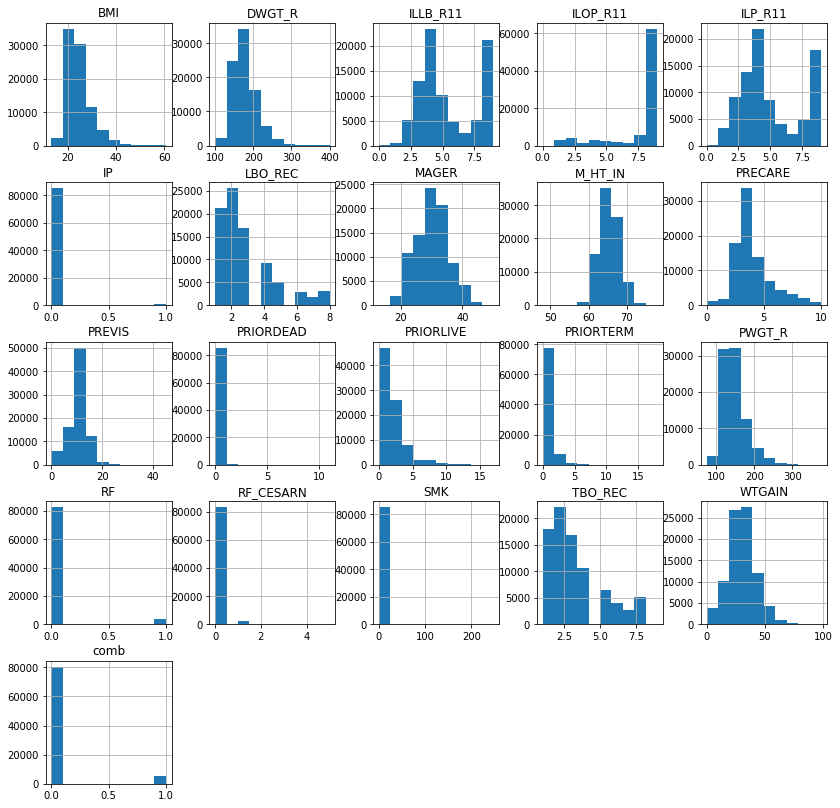

In [120]:
df_n[df_n.describe().columns].hist(figsize=(14,14));

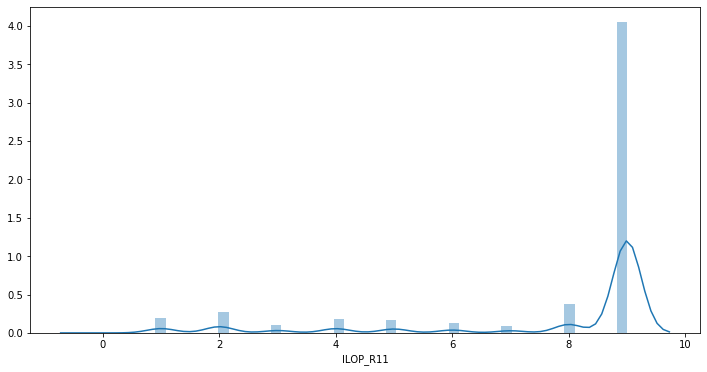

In [124]:
cols = ['ILLB_R11', 'ILP_R11','ILOP_R11']

plt.figure(figsize=(12,6))
#for col in cols:
sns.distplot(df_n['ILOP_R11'])

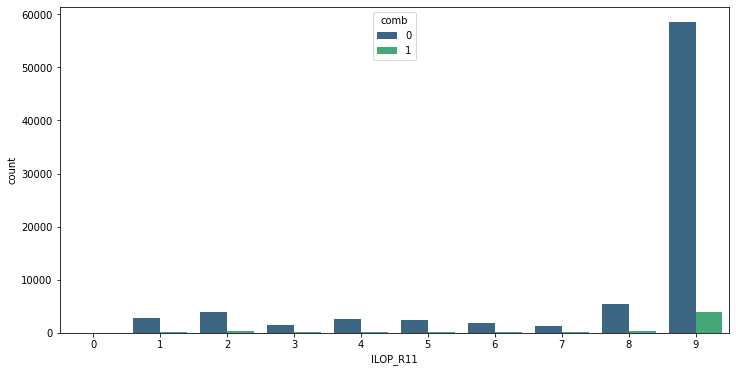

In [126]:
plt.figure(figsize=(12,6))
sns.countplot(x=df_n.ILOP_R11, hue =df_n.comb, palette='viridis')

Text(0, 0.5, 'values')

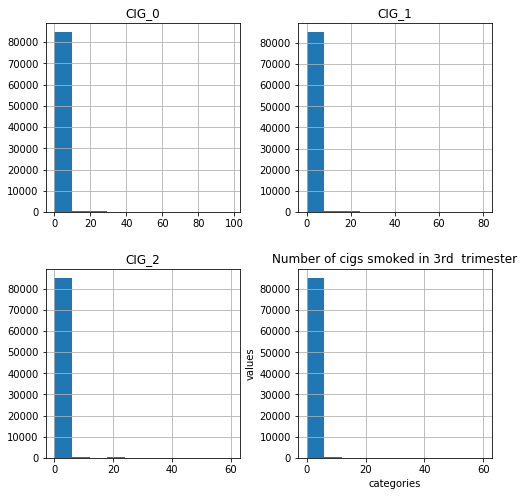

In [9]:
df[['CIG_0','CIG_1','CIG_2','CIG_3']].hist(figsize=(8,8), bins=10);
# Add title and axis names
plt.title('Number of cigs smoked in 3rd  trimester')
plt.xlabel('categories')
plt.ylabel('values')



([array([325., 363.,  68., 444.,  55.,   3., 442.,   4.,   5.,  20.,   0.,
           2.,   0.,  44.,   0.,   0.,   0.,   0.,   0.,   7.]),
  array([549., 649., 133., 779.,  88.,   6., 676.,   6.,   7.,  25.,   0.,
           3.,   0.,  68.,   0.,   0.,   2.,   0.,   0.,  11.]),
  array([ 744.,  902.,  179., 1087.,  111.,    7.,  833.,    7.,    9.,
           29.,    0.,    3.,    0.,   82.,    0.,    0.,    3.,    0.,
            0.,   14.]),
  array([ 965., 1146.,  216., 1360.,  128.,    8.,  969.,    8.,   10.,
           33.,    0.,    3.,    0.,   91.,    0.,    0.,    4.,    0.,
            0.,   18.])],
 array([ 1.  ,  3.95,  6.9 ,  9.85, 12.8 , 15.75, 18.7 , 21.65, 24.6 ,
        27.55, 30.5 , 33.45, 36.4 , 39.35, 42.3 , 45.25, 48.2 , 51.15,
        54.1 , 57.05, 60.  ]),
 <a list of 4 Lists of Patches objects>)

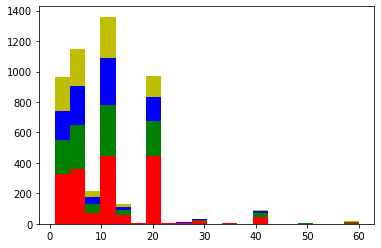

In [25]:

plt.hist([df['CIG_0'],df['CIG_1'],df['CIG_2'],df['CIG_3']],
          bins=20, range=(1,60), stacked=True, color = ['r','g','b','y'])

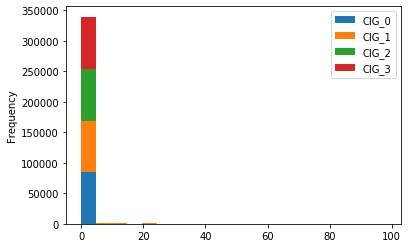

In [23]:
#df[['CIG_0','CIG_1','CIG_2','CIG_3']].plot.bar()

df[['CIG_0','CIG_1','CIG_2','CIG_3']].plot.hist(stacked=True, bins=20)

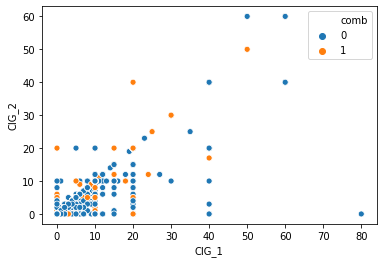

In [8]:
sns.scatterplot(x=df.CIG_1, y= df.CIG_2,hue = df.comb)

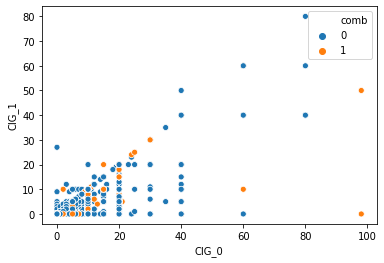

In [9]:
sns.scatterplot(x=df.CIG_0, y= df.CIG_1,hue = df.comb)

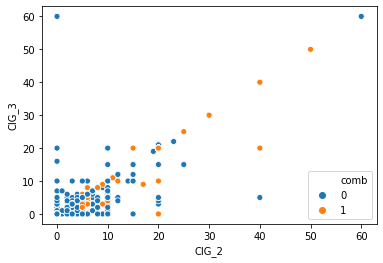

In [10]:
sns.scatterplot(x=df.CIG_2, y= df.CIG_3,hue = df.comb)

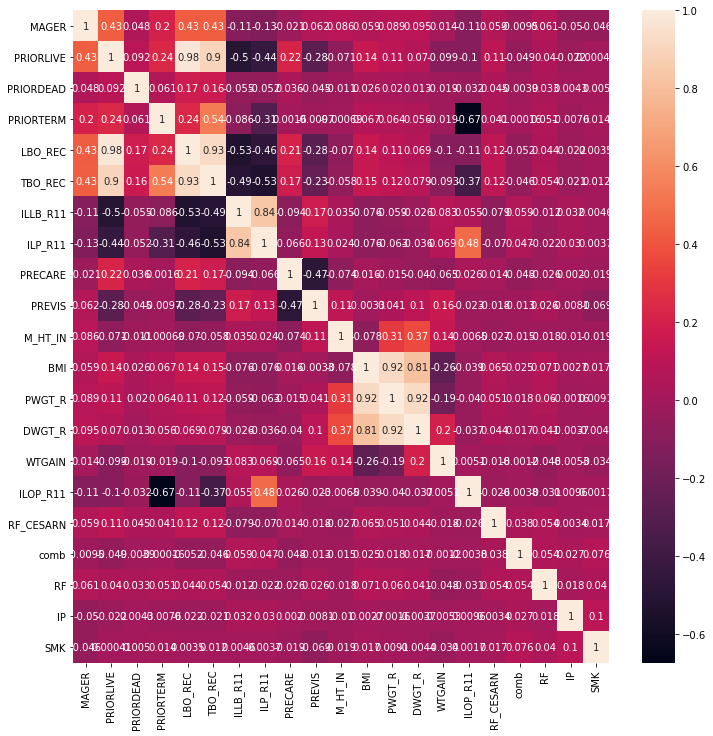

In [13]:
corrMatrix = df_n.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

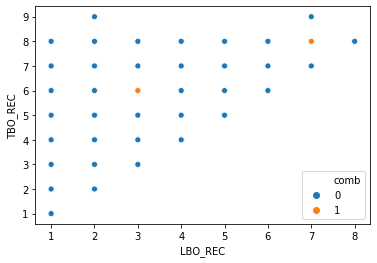

In [17]:
sns.scatterplot(x=df_n.LBO_REC, y= df_n.TBO_REC,hue = df.comb)

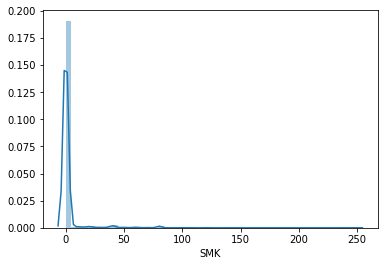

In [21]:
sns.distplot(df_n[df_n['comb']==1]['SMK'])

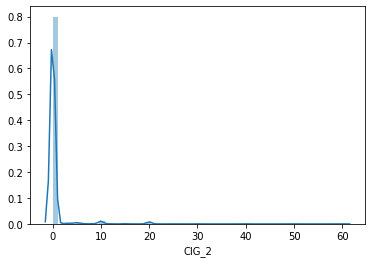

In [25]:
sns.distplot(df[df['comb']==1]['CIG_2'])